# Table of Contents <a id='back'></a>

* [1.Iniciação, Carregamento de Dados e Exploração de Dados](#inicio)
* [2. Analisando dados](#analise)
    * [2.1. Calculando as métricas pelo produto](#produto)
        * [2.1.1. Utilização por dia, semana e mês](#utilizacao)
        * [2.2.2. Quantas utilizações ocorrem por dia](#sessoes)
        * [2.2.3. Que comprimento tem cada sessão](#comprimento)
        * [2.2.4. Com que frequência os usuários voltam](#frequencia)
    * [2.2. Calculando as métricas pela venda](#venda)
        * [2.2.1. Quando as pessoas começam a comprar](#quando)
        * [2.2.2. Quantos pedidos os clientes fazem durante um determinado período de tempo](#quantidade)
        * [2.2.3. Qual é o volume médio de uma compra](#volume)
        * [2.2.4. Quanto dinheiro eles trazem para a empresa (LTV)](#ltv)
    * [3.3. Calculando as métricas pelo marketing](#marketing)
        * [3.3.1. Quanto dinheiro foi gasto no total/por origem/ao longo do tempo](#gasto)
        * [3.3.2. Quanto custou a aquisição de clientes para cada origem](#custo)
        * [3.3.3. Os investimentos valeram a pena? (ROI)](#roi)
* [3. Conclusão](#conclusao)



# OTIMIZANDO AS DESPESAS COM MARKETING

Esse estudo tem como escopo ajudar a empresa Y.Afisha a ter suas despesas com marketing otimizadas. Para isso, realizaremos algumas análises quanto a como as pessoas usam o produto, quando começam a comprar, bem como quanto valor monetário cada cliente traz para a empresa e quais as despesas serão cobertas.


# 1. Iniciação, Carregamento de Dados e Exploração de Dados <a id='inicio'></a>

Carregaremos as bibliotecas e carregaremos os dados sobre os acessos, pedidos e despesas. Para começar, iniciaremos a otimização dos dados e, tendo os 3 dataframes, iremos carregar apenas as 500 primeiras linhas de cada conjunto de dados. Para começar a verificar os dados, iremos observar as 10 linhas de cada conjunto de dados.

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [103]:
#path='/datasets/'
path = 'C://Users//tha_s//Downloads//'
visits = pd.read_csv(path + 'visits_log_us.csv')
print(visits)

         Device               End Ts  Source Id             Start Ts  \
0         touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1       desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2         touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3       desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4       desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   
...         ...                  ...        ...                  ...   
359395  desktop  2017-07-29 19:07:19          2  2017-07-29 19:07:00   
359396    touch  2018-01-25 17:38:19          1  2018-01-25 17:38:00   
359397  desktop  2018-03-03 10:12:19          4  2018-03-03 10:12:00   
359398  desktop  2017-11-02 10:12:19          5  2017-11-02 10:12:00   
359399    touch  2017-09-10 13:13:19          2  2017-09-10 13:13:00   

                         Uid  
0       16879256277535980062  
1         104060357244891740  
2        7459035603376831527  
3       161

In [104]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


In [105]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [106]:
visits['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

In [107]:
visits['Device'] = visits['Device'].astype('category')

In [108]:
visits['Start Ts'] =  pd.to_datetime(visits['Start Ts'], format="%Y.%m.%d %H:%M") 

In [109]:
visits['End Ts'] =  pd.to_datetime(visits['End Ts'], format="%Y.%m.%d %H:%M") 

In [110]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [111]:
visits.columns = visits.columns.str.lower()

In [112]:
visits = visits.rename(columns={'end ts': 'end_ts', 'source id': 'source_id', 'start ts': 'start_ts'})

In [113]:
visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [114]:
if visits.isnull().values.any():
    print("Existem valores ausentes no dataframe.")
else:
    print("Nao ha valores ausentes no dataframe.")

Nao ha valores ausentes no dataframe.


In [115]:
if visits.duplicated().any():
    print("Existem dados duplicados no dataframe.")
else:
    print("Nao ha dados duplicados no dataframe.")

Nao ha dados duplicados no dataframe.


Verificamos que havia muitos dados constando como objeto e, sabendo que dados do tipo objeto ocupam mais espaço e algumas vezes não são o tipo correto para utilizar em nossas análises, decidimos buscar otimizações para o conjunto de dados. Assim, observamos que na coluna 'Device' tratava-se, na verdade, de uma categoria, e para otimizar, transformamos os dados em category. Também, nas colunas 'End Ts' e 'Start Ts', que se tratam de datas, e visando não só otimizar os dados, mas também corrigi-los, alteramos para o tipo datetime64[ns]. Ainda, tendo em vista que os nomes das colunas possuíam letras maiúsculas e minúsculas, decidimos arrumar a grafia para que ficasse tudo em letra minúscula, melhorando a aparência visual.

Também pudemos constatar que não havia dados ausentes no dataframe e, de modo geral, não foram encontrados dados duplicados. Obviamente, se analisarmos coluna a coluna, poderíamos encontrar dados duplicados, porém isso deve ocorrer pelo tipo da informação, como no exemplo da coluna 'device', onde há apenas dois tipos de dispositivos e cada linha possui um dos tipos.

In [116]:
#path='/datasets/'
path = 'C://Users//tha_s//Downloads//'
orders = pd.read_csv(path + 'orders_log_us.csv')
print(orders)

                    Buy Ts  Revenue                   Uid
0      2017-06-01 00:10:00    17.00  10329302124590727494
1      2017-06-01 00:25:00     0.55  11627257723692907447
2      2017-06-01 00:27:00     0.37  17903680561304213844
3      2017-06-01 00:29:00     0.55  16109239769442553005
4      2017-06-01 07:58:00     0.37  14200605875248379450
...                    ...      ...                   ...
50410  2018-05-31 23:50:00     4.64  12296626599487328624
50411  2018-05-31 23:50:00     5.80  11369640365507475976
50412  2018-05-31 23:54:00     0.30   1786462140797698849
50413  2018-05-31 23:56:00     3.67   3993697860786194247
50414  2018-06-01 00:02:00     3.42     83872787173869366

[50415 rows x 3 columns]


In [117]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [118]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [119]:
orders['Buy Ts'] =  pd.to_datetime(orders['Buy Ts'], format="%Y.%m.%d %H:%M") 

In [120]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [121]:
orders.columns = orders.columns.str.lower()

In [122]:
orders = orders.rename(columns={'buy ts': 'buy_ts'})

In [123]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [124]:
if orders.isnull().values.any():
    print("Existem valores ausentes no dataframe.")
else:
    print("Nao ha valores ausentes no dataframe.")

Nao ha valores ausentes no dataframe.


In [125]:
if orders.duplicated().any():
    print("Existem dados duplicados no dataframe.")
else:
    print("Nao ha dados duplicados no dataframe.")

Nao ha dados duplicados no dataframe.


No conjunto de dados do dataframe 'orders', também verificamos que a coluna 'Buy Ts', que se tratava de uma data, constava como objeto e, para otimizar e corrigir os dados, mudamos para datetime64[ns]. Ainda, tendo em vista que os nomes das colunas possuíam letras maiúsculas e minúsculas, decidimos arrumar a grafia para que ficasse tudo em letra minúscula, melhorando a aparência visual.

Também pudemos constatar que não havia dados ausentes no dataframe e, de modo geral, não foram encontrados dados duplicados. Novamente, entendemos que, se analisarmos coluna a coluna, poderíamos encontrar dados duplicados; por óbvio, isso ocorreria devido à informação em cada linha, como, por exemplo, o mesmo valor de receita.

In [126]:
#path='/datasets/'
path = 'C://Users//tha_s//Downloads//'
costs = pd.read_csv(path + 'costs_us.csv')
print(costs)

      source_id          dt  costs
0             1  2017-06-01  75.20
1             1  2017-06-02  62.25
2             1  2017-06-03  36.53
3             1  2017-06-04  55.00
4             1  2017-06-05  57.08
...         ...         ...    ...
2537         10  2018-05-27   9.92
2538         10  2018-05-28  21.26
2539         10  2018-05-29  11.32
2540         10  2018-05-30  33.15
2541         10  2018-05-31  17.60

[2542 rows x 3 columns]


In [127]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [128]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [129]:
costs['dt'] =  pd.to_datetime(costs['dt'], format="%Y.%m.%d %H:%M")

In [130]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [131]:
if costs.isnull().values.any():
    print("Existem valores ausentes no dataframe.")
else:
    print("Nao ha valores ausentes no dataframe.")

Nao ha valores ausentes no dataframe.


In [132]:
if costs.duplicated().any():
    print("Existem dados duplicados no dataframe.")
else:
    print("Nao ha dados duplicados no dataframe.")

Nao ha dados duplicados no dataframe.


O mesmo procedimento para otimizar e corrigir os dados foi realizado no conjunto de dados do dataframe 'costs'. A coluna 'dt', que se tratava de data e constava como dados do tipo objeto, foi alterada para que os dados fossem apresentados no tipo datetime64[ns].

Novamente, pudemos constatar que não havia dados ausentes no dataframe e, de modo geral, não foram encontrados dados duplicados. E também, se analisarmos coluna a coluna, obviamente poderíamos encontrar dados duplicados, o que ocorre devido à informação de cada linha.

Não fundimos as três tabelas, tendo em vista que, mesmo otimizando os dados, o tamanho ficaria de um modo que impossibilitaria a leitura do arquivo. Ademais, pela forma que iremos conduzir o estudo, poderemos trabalhar com elas individualmente e, quando necessário, poderemos fundir colunas para seguir com a análise.

[Voltar ao Indice](#back)

# 2. Analisando dados <a id='analise'></a>

Iremos agora analisar os dados para que possamos identificar as métricas pelo produto, venda e marketing.

### 2.1. Calculando as métricas pelo produto <a id='produto'></a>

Comecaremos a analisar os dados para que possamos ter informações sobre como as pessoas se relacionam com o produto. Calcularemos as métricas pelo produto e para isso iremos analisar os seguintes pontos: 

- Quantas pessoas usam o produto por dia, semana e mês;
- Quantas sessões ocorrem por dia;
- Que comprimento tem cada sessão;
- Com que frequência os usuários voltam.

#### 2.1.1. Utilização por dia, semana e mês <a id='utilizacao'></a>

Antes de começarmos a verificar quantas utilizações houve por dia, semana e mês, iremos criar colunas separadas para os valores de ano, mês e semana. Com as colunas criadas, as quais também serão utilizadas mais adiante, passaremos à análise da utilização pelo usuário.

Iremos encontrar como foi a utilização média dos usuários por dia, agrupando os dados por data da sessão, agregando-os pelos usuários usando o nunique, e utilizaremos o mean para verificar a média. Já para encontrar a utilização média por semana, agruparemos os dados por ano e semana da sessão, agregando-os pelos usuários usando o nunique, e utilizaremos o mean para verificar a média. Por fim, para obter a utilização média por mês, agruparemos os dados por ano e mês da sessão, agregando-os pelos usuários usando o nunique, e utilizaremos o mean para verificar a média.

Também iremos criar um gráfico para verificar como foi a utilização por dia, semana e mês.

In [133]:
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['session_week'] = visits['start_ts'].astype('datetime64[W]')
visits['session_date'] = visits['start_ts'].dt.date
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,2017-12-21,2017-12-27


In [134]:
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'})
dau_total.head(5)

,uid
session_date,
2017-06-01,605
2017-06-02,608
2017-06-03,445
2017-06-04,476
2017-06-05,820


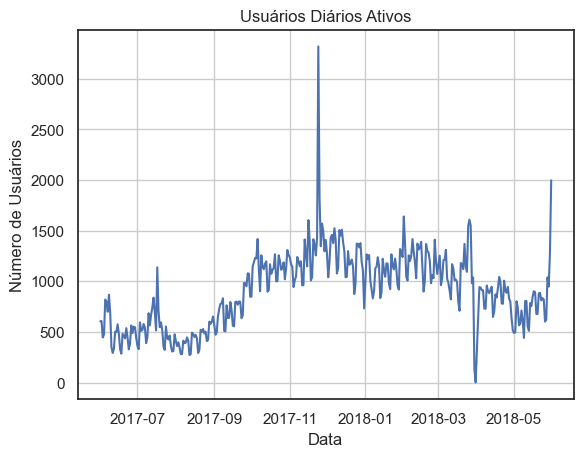

In [135]:
plt.plot(dau_total.index, dau_total['uid'])
plt.title('Usuários Diários Ativos')
plt.xlabel('Data')
plt.ylabel('Número de Usuários')
plt.grid(True)
plt.show()

In [136]:
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
print(int(dau_total))

907


Observando o gráfico, verificamos que houve um pico de usuários em um dia, mas, normalmente, a utilização se mantém próxima. Calculando a média, observamos que a utilização diária está em 907 usuários.

In [137]:
wau_total = visits.groupby('session_week').agg({'uid': 'nunique'})
wau_total.head(5)

,uid
session_week,
2017-06-01,4082
2017-06-08,3311
2017-06-15,2844
2017-06-22,3079
2017-06-29,3055


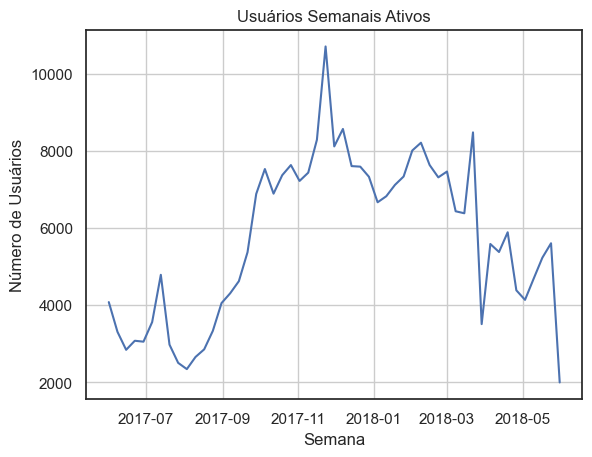

In [138]:
plt.plot(wau_total.index, wau_total['uid'])
plt.title('Usuários Semanais Ativos')
plt.xlabel('Semana')
plt.ylabel('Número de Usuários')
plt.grid(True)
plt.show()

In [139]:
wau_total = (visits.groupby(['session_week']).agg({'uid': 'nunique'}).mean())
print(int(wau_total))

5724


Observando o gráfico, verificamos que houve um pico de usuários em um dia; porém, antes disso, a utilização foi crescendo e depois começou a diminuir, com alguns aumentos esporádicos, mas nada significativo em comparação com o pico observado. Calculando a média, observamos que a utilização semanal está em 5.724 usuários.

In [140]:
mau_total = visits.groupby('session_month').agg({'uid': 'nunique'})
mau_total.head(5)

,uid
session_month,
2017-06-01,13259
2017-07-01,14183
2017-08-01,11631
2017-09-01,18975
2017-10-01,29692


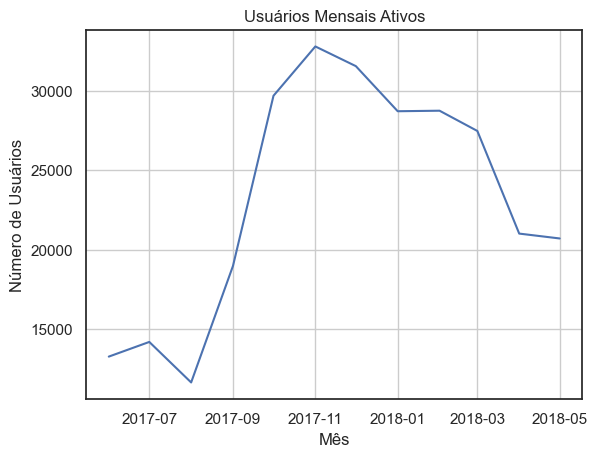

In [141]:
plt.plot(mau_total.index, mau_total['uid'])
plt.title('Usuários Mensais Ativos')
plt.xlabel('Mês')
plt.ylabel('Número de Usuários')
plt.grid(True)
plt.show()

In [142]:
mau_total = (visits.groupby(['session_month']).agg({'uid': 'nunique'}).mean())
print(int(mau_total))

23228


Observando o gráfico, verificamos que o número de usuários foi aumentando constantemente até atingir um máximo e, depois, foi diminuindo mês a mês. Calculando a média, observamos que a utilização mensal está em 23.228 usuários.

Com os cálculos e gráficos feitos, pudemos concluir que a utilização média corresponde a:
- diariamente: 907
- semanalmente: 5724
- mensalmente: 23228

[Voltar ao Indice](#back)

#### 2.1.2. Quantas utilizações ocorrem por dia <a id='sessoes'></a>

Iremos agora identificar quantas utilizações ocorrem por dia e, para isso, dividiremos o número de sessões pelo número de usuários. Porém, antes de realizarmos o cálculo, iremos agrupar as colunas 'session_year' e 'session_date', e agregaremos a coluna 'uid' com as funções 'count' e 'nunique', nomeando as colunas resultantes como 'n_sessions' e 'n_users'. Com o agrupamento e o cálculo feitos, poderemos determinar a quantidade de utilizações feitas por dia.

In [143]:
utilizacao = visits.groupby(['session_date']).agg({'uid': ['count', 'nunique']})
utilizacao.columns = ['n_sessions', 'n_users']

In [144]:
print(utilizacao)

              n_sessions  n_users
session_date                     
2017-06-01           664      605
2017-06-02           658      608
2017-06-03           477      445
2017-06-04           510      476
2017-06-05           893      820
...                  ...      ...
2018-05-27           672      620
2018-05-28          1156     1039
2018-05-29          1035      948
2018-05-30          1410     1289
2018-05-31          2256     1997

[364 rows x 2 columns]


In [145]:
utilizacao['utilizacao_dia'] = (utilizacao['n_sessions'] / utilizacao['n_users'])
utilizacao

,n_sessions,n_users,utilizacao_dia
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024
...,...,...,...
2018-05-27,672,620,1.083871
2018-05-28,1156,1039,1.112608
2018-05-29,1035,948,1.091772


In [146]:
pivot_table = pd.pivot_table(utilizacao, values='utilizacao_dia', index='session_date').reset_index()
pivot_table

,session_date,utilizacao_dia
0,2017-06-01,1.097521
1,2017-06-02,1.082237
2,2017-06-03,1.071910
3,2017-06-04,1.071429
4,2017-06-05,1.089024
...,...,...
359,2018-05-27,1.083871
360,2018-05-28,1.112608
361,2018-05-29,1.091772
362,2018-05-30,1.093871


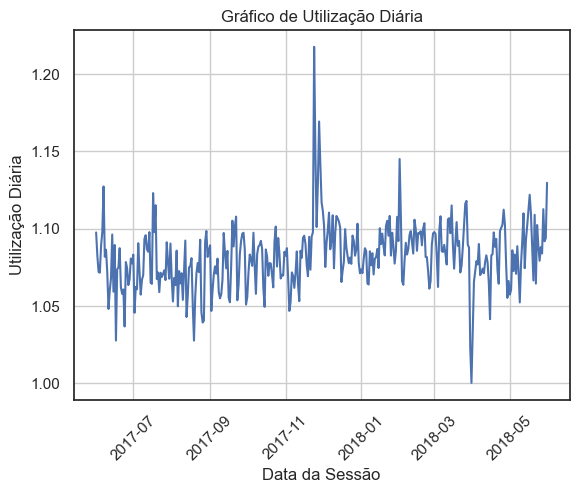

In [147]:
pivot_table = pd.pivot_table(utilizacao, values='utilizacao_dia', index='session_date')

plt.plot(pivot_table.index, pivot_table.values)
plt.xlabel('Data da Sessão')
plt.ylabel('Utilização Diária')
plt.title('Gráfico de Utilização Diária')
plt.xticks(rotation=45)  
plt.grid(True)  
plt.show()

In [148]:
print(round(utilizacao['utilizacao_dia'].mean(),2))

1.08


Sabendo que seria útil determinar o número de sessões por usuário por dia e que esse seria um bom indicador da frequência de uso de um produto, pudemos observar quantas utilizações ocorreram por dia e como variam quanto ao dia e à quantidade de usuários que utilizaram. Inicialmente, pudemos identificar aproximadamente uma (1) sessão por dia por usuário em cada linha da tabela.

Porém, ao calcular a média, pudemos concluir e confirmar que houve uma (1) sessão por dia por usuário.

[Voltar ao Indice](#back)

#### 2.1.3. Que comprimento tem cada sessão <a id='comprimento'></a>

Ainda para calcular a métrica pelo produto, iremos agora verificar o comprimento de cada sessão e, para isso, encontraremos a quantidade média de tempo que os usuários passam com um produto na sessão. Para esses cálculos, iremos subtrair a coluna end_ts (quando a sessão terminou) da coluna start_ts (quando a sessão começou) e imprimiremos, checando a média.

In [149]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
print(visits['session_duration_sec'].mean())

643.506488592098


In [150]:
visits['session_duration_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

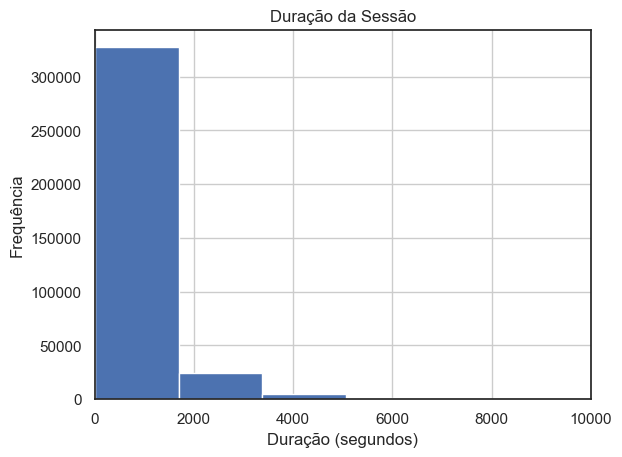

In [151]:
visits['session_duration_sec'].hist(bins=50)
plt.title('Duração da Sessão')
plt.xlabel('Duração (segundos)')
plt.ylabel('Frequência')
plt.xlim(0,10000)
plt.show()

In [152]:
session_duration = visits['session_duration_sec']
session_duration_mean = session_duration.mean()
round(session_duration_mean, 2)

643.51

In [153]:
print("A moda da duração da sessão em segundos é: {} segundos.".format(visits['session_duration_sec'].mode()[0]))

A moda da duração da sessão em segundos é: 60 segundos.


Concluímos que a duração média em segundos foi de 643,50. Também verificamos que a duração mediana foi de 300 segundos e a máxima foi de 84.480 segundos.

Para melhor análise, fizemos um histograma e vimos que a distribuição não era normal. Assim, não poderíamos usar nem a média nem a mediana, então calculamos a moda. Quando fizemos o cálculo da moda, verificamos que a duração mais comum da sessão é de 60 segundos.

[Voltar ao Indice](#back)

#### 2.1.4. Com que frequência os usuários voltam <a id='frequencia'></a>

Para sabermos com que frequência os usuários voltam iremos calcular a taxa de retenção. Para isso iremos seguir os seguintes passos: 

- verificaremos quando foi a primeira visita e faremos uma cohort agrupando os usuários com a data da primeira visita de cada usuário e converteremos os dados para constarem como datetime;

- juntaremos esse cohort com a tabela visits;

- calcularemos a idade do cohort em meses e iremos subtrair a data de início do cohort da data de cada visita;

-  criaremos uma pivot table para calcular a quantidade de usuários em cada mês após a primeira visita;

- plotaremos um heatmap com esses resultados.

In [154]:
cohort_visit = visits.groupby('uid')['start_ts'].min().reset_index()
cohort_visit.columns = ['uid', 'first_visit_month']
cohort_visit

,uid,first_visit_month
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00
...,...,...
228164,18446403737806311543,2017-11-30 03:36:00
228165,18446424184725333426,2017-12-06 20:32:00
228166,18446556406699109058,2018-01-01 16:29:00
228167,18446621818809592527,2017-12-27 13:27:00


In [155]:
cohort_visit['first_visit_month'] = cohort_visit['first_visit_month'].astype('datetime64[M]')
cohort_visit['first_visit_month'].head()

0   2018-03-01
1   2018-02-01
2   2017-06-01
3   2017-09-01
4   2017-09-01
Name: first_visit_month, dtype: datetime64[ns]

In [156]:
visits_with_cohort = pd.merge(visits, cohort_visit, on='uid')
visits_with_cohort.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_visit_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-01
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,2018-03-01,2018-03-08,2018-03-09,1680,2018-03-01


In [157]:
visits_with_cohort['visits_session_month'] = visits_with_cohort['start_ts'].astype('datetime64[M]')
visits_with_cohort['visits_session_month']

0        2017-12-01
1        2018-02-01
2        2017-07-01
3        2018-05-01
4        2018-03-01
            ...    
359395   2018-04-01
359396   2017-11-01
359397   2017-07-01
359398   2018-03-01
359399   2018-04-01
Name: visits_session_month, Length: 359400, dtype: datetime64[ns]

In [158]:
visits_with_cohort['cohort_age'] = (visits_with_cohort['visits_session_month'] - visits_with_cohort['first_visit_month']) / np.timedelta64(1, 'M')
visits_with_cohort['cohort_age'] = visits_with_cohort['cohort_age'].round().astype('int') 
visits_with_cohort['cohort_age']

0         0
1         0
2         0
3         2
4         0
         ..
359395    0
359396    0
359397    0
359398    0
359399    0
Name: cohort_age, Length: 359400, dtype: int32

In [159]:
cohort_retencao = (visits_with_cohort.groupby(['first_visit_month', 'cohort_age']).agg({'uid':'nunique'}).reset_index())
cohort_retencao

,first_visit_month,cohort_age,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
...,...,...,...
73,2018-03-01,1,861
74,2018-03-01,2,557
75,2018-04-01,0,15709
76,2018-04-01,1,760


In [160]:
initial_users_count = cohort_retencao[cohort_retencao['cohort_age'] == 0][['first_visit_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid': 'cohort_users'})
initial_users_count

,first_visit_month,cohort_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


In [161]:
cohort = cohort_retencao.merge(initial_users_count, on='first_visit_month')
cohort

,first_visit_month,cohort_age,uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259
...,...,...,...,...
73,2018-03-01,1,861,20589
74,2018-03-01,2,557,20589
75,2018-04-01,0,15709,15709
76,2018-04-01,1,760,15709


In [162]:
cohort['retention'] = cohort['uid'] / cohort['cohort_users'] 
cohort['retention']

0     1.000000
1     0.078664
2     0.053775
3     0.061392
4     0.068557
        ...   
73    0.041818
74    0.027053
75    1.000000
76    0.048380
77    1.000000
Name: retention, Length: 78, dtype: float64

In [163]:
retention_pivot = cohort.pivot_table(index='first_visit_month', columns='cohort_age', values='retention', aggfunc='sum')
retention_pivot.fillna('')


cohort_age,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,,
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.03586,0.024186,0.022809,,,
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,,,,
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.0218,,,,,
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,,,,,,
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,,,,,,,
2018-02-01,1.0,0.05708,0.025454,0.020093,,,,,,,,


<AxesSubplot:title={'center':'Coortes: Retenção de Usuário'}, xlabel='cohort_age', ylabel='first_visit_month'>

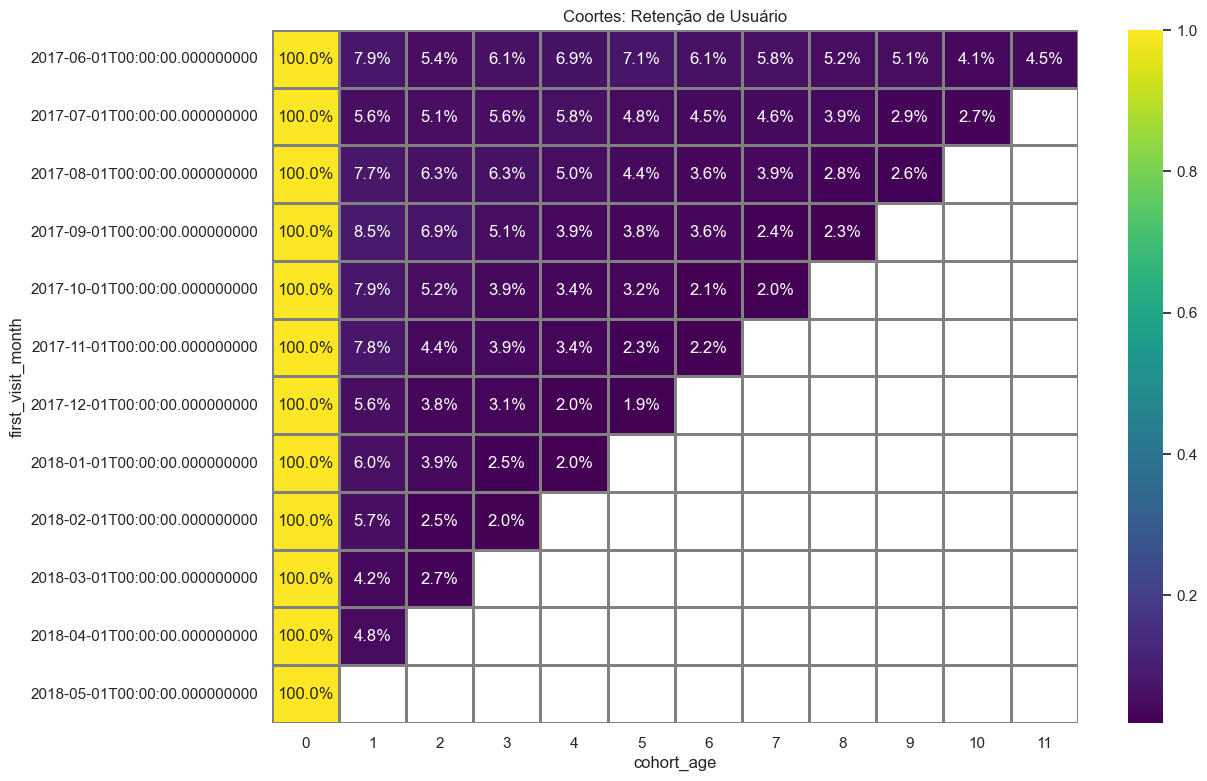

In [164]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Coortes: Retenção de Usuário')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='grey', cmap='viridis') 

Verificamos a frequência com que os usuários voltaram, calculando a taxa de retenção, e observamos, por exemplo, que 7,9% dos clientes que visitaram o site pela primeira vez em junho de 2017 retornaram no segundo mês (coluna 1) e 5,4% retornaram no terceiro mês (coluna 2). Após isso, a frequência seguiu caindo até ter um aumento no mês 4; porém, a partir do mês 4, notamos que a taxa de retenção foi caindo mês a mês. O mesmo foi observado nos demais meses, onde a taxa de retenção diminuiu a cada mês desde a primeira visita do cliente.

Portanto, concluímos que quanto mais tempo passa desde a primeira visita do cliente, menor é a probabilidade de que ele volte. Além disso, podemos observar que a maioria dos clientes não retorna após os primeiros meses.

[Voltar ao indice](#back)

### 2.2. Calculando as métricas pela venda <a id='venda'></a>

Passaremos agora a analisar os dados para que possamos ter informações sobre as vendas do produto. Iremos calcular as métricas pela venda e para isso iremos analisar os seguintes pontos: 
- Quando as pessoas começam a comprar;
- Quantos pedidos os clientes fazem durante um determinado período de tempo;
- Qual é o volume médio de uma compra;
- Quanto dinheiro eles trazem para a empresa (LTV).

#### 2.2.1. Quando as pessoas começam a comprar <a id='quando'></a>

Para identificarmos quando as pessoas começam a comprar, iremos identificar quando foi a primeira sessão e quando foi a primeira compra dos usuários.

Primeiramente, criaremos uma coluna first_session_month usando a coluna start_ts, convertendo-a em uma coluna com tipo de dados de data/hora com resolução mensal (M). Com a nova coluna criada, agruparemos os usuários e agregaremos a coluna first_session_month, calculando seu valor mínimo para determinar quando foi a primeira sessão. Também criaremos uma coluna first_purchase_month usando a coluna buy_ts, convertendo-a em uma coluna com tipo de dados de data/hora com resolução mensal (M). Agora, para determinar quando foi a primeira compra, agruparemos os usuários e agregaremos a coluna first_purchase_month, calculando seu valor mínimo.

Com as duas tabelas criadas, iremos fundi-las em uma só para que possamos calcular o tempo de conversão, ou seja, o tempo médio que leva para um usuário fazer uma compra após o primeiro acesso ao site.

Assim, com essa nova tabela criada, subtrairemos a coluna first_session_month da coluna first_purchase_month para cada usuário e criaremos uma nova coluna com o resultado. Tendo o resultado da taxa de conversão por usuário, iremos também calcular o tempo médio que o usuário demorou para fazer a compra desde o primeiro acesso.

In [165]:
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')

In [166]:
first_session = visits.groupby('uid').agg({'session_month': 'min'}).reset_index()
first_session.columns = ['uid', 'first_session_month']
first_session.head(10)

,uid,first_session_month
0,11863502262781,2018-03-01
1,49537067089222,2018-02-01
2,297729379853735,2017-06-01
3,313578113262317,2017-09-01
4,325320750514679,2017-09-01
5,397399764396656,2018-01-01
6,407573351275847,2017-06-01
7,498809019029702,2018-02-01
8,526778907996220,2017-10-01
9,577434573913691,2018-01-01


In [167]:
orders['purchase_month'] = orders['buy_ts'].astype('datetime64[M]')

In [168]:
first_purchase = orders.groupby('uid').agg({'purchase_month': 'min'}).reset_index()
first_purchase.columns = ['uid', 'first_purchase_month']
first_purchase.head(10)

,uid,first_purchase_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01
5,3077748354309989,2018-03-01
6,3605148382144603,2017-09-01
7,3753586865891862,2018-03-01
8,4808417689019433,2018-01-01
9,4992223027560440,2018-04-01


In [169]:
buyers = pd.merge(first_session, first_purchase, on='uid')
buyers

,uid,first_session_month,first_purchase_month
0,313578113262317,2017-09-01,2018-01-01
1,1575281904278712,2017-06-01,2017-06-01
2,2429014661409475,2017-10-01,2017-10-01
3,2464366381792757,2018-01-01,2018-01-01
4,2551852515556206,2017-11-01,2017-11-01
...,...,...,...
36518,18445147675727495770,2017-08-01,2017-11-01
36519,18445407535914413204,2017-09-01,2017-09-01
36520,18445601152732270159,2017-08-01,2018-03-01
36521,18446156210226471712,2017-11-01,2018-02-01


In [170]:
buyers['days_to_conversion'] = (buyers['first_purchase_month'] - buyers['first_session_month']).dt.days
buyers.head(10)

,uid,first_session_month,first_purchase_month,days_to_conversion
0,313578113262317,2017-09-01,2018-01-01,122
1,1575281904278712,2017-06-01,2017-06-01,0
2,2429014661409475,2017-10-01,2017-10-01,0
3,2464366381792757,2018-01-01,2018-01-01,0
4,2551852515556206,2017-11-01,2017-11-01,0
5,3077748354309989,2018-03-01,2018-03-01,0
6,3605148382144603,2017-08-01,2017-09-01,31
7,3753586865891862,2018-03-01,2018-03-01,0
8,4808417689019433,2018-01-01,2018-01-01,0
9,4992223027560440,2018-04-01,2018-04-01,0


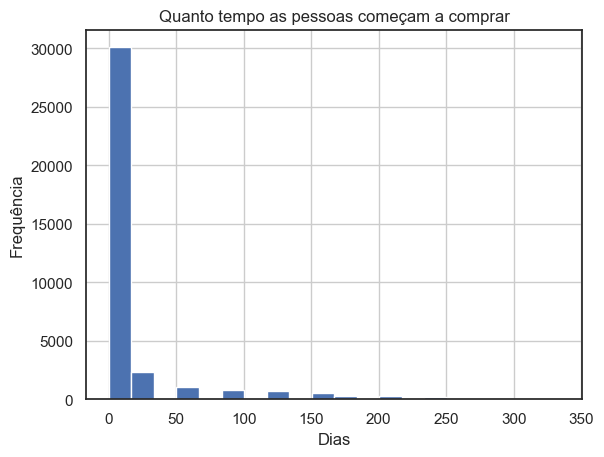

In [171]:
buyers['days_to_conversion'].hist(bins=20)
plt.title('Quanto tempo as pessoas começam a comprar')
plt.xlabel('Dias')
plt.ylabel('Frequência')
plt.show()

In [172]:
round(buyers['days_to_conversion'].mean())

17

Encontrando a taxa de conversão por usuário, pudemos concluir que houve clientes que realizaram a compra no mesmo mês e dia do primeiro acesso, mas também houve usuários que esperaram dias até realizar a compra. Observando o gráfico, vimos que, na sua grande maioria, os usuários fazem a primeira compra no seu primeiro acesso. No entanto, também verificamos que, em média, um cliente leva 17 dias do primeiro acesso para fazer sua primeira compra.

[Voltar ao Indice](#back)

#### 2.2.2. Quantos pedidos os clientes fazem durante um determinado período de tempo <a id='quantidade'></a>

Para sabermos quantos pedidos os clientes fazem durante um determinado período de tempo primeiramente iremos juntar a tabela orders com first_purchase e depois fazeremos um cohort na tabela buyers e iremos agrupar a coluna 'first_purchase_month' e a agregaremos com os usuários em nunique. 

Criaremos um novo dataframe com os conjunto de dados orders e first_purchase para que possamos fazer mais uma cohort agrupando as colunas 'first_purchase_month','purchase_month', as agregando em 'uid' e contando, para que tenhamos a coluna total_orders. 

Com as duas cohorts feitas iremos fundi-las e encontraremos a idade em meses e verificaremos quantos pedidos os clientes fizeram. Para ilustrar iremos fazer um heatmap. 

In [173]:
orders_join = orders.join(first_purchase.set_index('uid'), on='uid')
orders_join

,buy_ts,revenue,uid,purchase_month,first_purchase_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01


In [174]:
cohort_first_purchase = buyers.groupby('first_purchase_month').agg({'uid': 'nunique'}).reset_index()
cohort_first_purchase.columns = ['first_purchase_month', 'n_buyers']
cohort_first_purchase.head(10)

,first_purchase_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [175]:
orders_ = pd.merge(orders,first_purchase, on='uid')
orders_.head()

,buy_ts,revenue,uid,purchase_month,first_purchase_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


In [176]:
cohorts_orders = orders_.groupby(['first_purchase_month','purchase_month']).agg({'uid': 'count'}).reset_index()
cohorts_orders.columns = ['first_purchase_month', 'purchase_month', 'total_orders']
cohorts_orders

,first_purchase_month,purchase_month,total_orders
0,2017-06-01,2017-06-01,2354
1,2017-06-01,2017-07-01,177
2,2017-06-01,2017-08-01,174
3,2017-06-01,2017-09-01,226
4,2017-06-01,2017-10-01,292
...,...,...,...
74,2018-03-01,2018-05-01,176
75,2018-04-01,2018-04-01,2495
76,2018-04-01,2018-05-01,195
77,2018-05-01,2018-05-01,3249


In [177]:
orders_buyers = pd.merge(cohort_first_purchase, cohorts_orders, on='first_purchase_month')
orders_buyers

,first_purchase_month,n_buyers,purchase_month,total_orders
0,2017-06-01,2023,2017-06-01,2354
1,2017-06-01,2023,2017-07-01,177
2,2017-06-01,2023,2017-08-01,174
3,2017-06-01,2023,2017-09-01,226
4,2017-06-01,2023,2017-10-01,292
...,...,...,...,...
74,2018-03-01,3533,2018-05-01,176
75,2018-04-01,2276,2018-04-01,2495
76,2018-04-01,2276,2018-05-01,195
77,2018-05-01,2988,2018-05-01,3249


In [178]:
orders_buyers['orders_per_user'] = (orders_buyers['total_orders'] / orders_buyers['n_buyers']) 
orders_buyers['orders_per_user']

0     1.163618
1     0.087494
2     0.086011
3     0.111715
4     0.144340
        ...   
74    0.049816
75    1.096221
76    0.085677
77    1.087349
78    1.000000
Name: orders_per_user, Length: 79, dtype: float64

In [179]:
orders_buyers['age_orders'] = (orders_buyers['purchase_month'] - orders_buyers['first_purchase_month']) / np.timedelta64(1, 'M')
orders_buyers['age_orders'] = orders_buyers['age_orders'].round().astype('int')
orders_buyers['age_orders']

0     0
1     1
2     2
3     3
4     4
     ..
74    2
75    0
76    1
77    0
78    0
Name: age_orders, Length: 79, dtype: int32

In [180]:
orders_buyers.head()

,first_purchase_month,n_buyers,purchase_month,total_orders,orders_per_user,age_orders
0,2017-06-01,2023,2017-06-01,2354,1.163618,0
1,2017-06-01,2023,2017-07-01,177,0.087494,1
2,2017-06-01,2023,2017-08-01,174,0.086011,2
3,2017-06-01,2023,2017-09-01,226,0.111715,3
4,2017-06-01,2023,2017-10-01,292,0.144340,4


In [181]:
orders_buyers['first_purchase_month'] = orders_buyers['first_purchase_month'].dt.strftime('%Y-%m')

In [182]:
orders_buyers_pivot = orders_buyers.pivot_table(index='first_purchase_month', columns='age_orders', values='orders_per_user', aggfunc='mean'
).cumsum(axis=1)

orders_buyers_pivot.fillna('')


age_orders,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_month,,,,,,,,,,,,
2017-06,1.163618,1.251112,1.337123,1.448838,1.593178,1.700939,1.83737,1.923381,2.028176,2.103806,2.151261,2.193772
2017-07,1.136765,1.188768,1.25117,1.305252,1.342694,1.385335,1.417057,1.443058,1.473219,1.485699,1.513261,
2017-08,1.118978,1.19781,1.270803,1.329927,1.391971,1.437226,1.472993,1.529927,1.563504,1.59708,,
2017-09,1.136381,1.221232,1.283611,1.347152,1.373111,1.415343,1.457187,1.478884,1.502518,,,
2017-10,1.143779,1.216129,1.253456,1.281567,1.31129,1.335023,1.354839,1.383641,,,,
2017-11,1.179368,1.276648,1.321245,1.372948,1.406273,1.42073,1.445724,,,,,
2017-12,1.152635,1.214237,1.260324,1.301164,1.320785,1.344741,,,,,,
2018-01,1.121554,1.187963,1.235102,1.254076,1.277201,,,,,,,
2018-02,1.121611,1.182416,1.205149,1.224322,,,,,,,,


<AxesSubplot:title={'center':'Quantidade de pedidos feitos por mes'}, xlabel='age_orders', ylabel='first_purchase_month'>

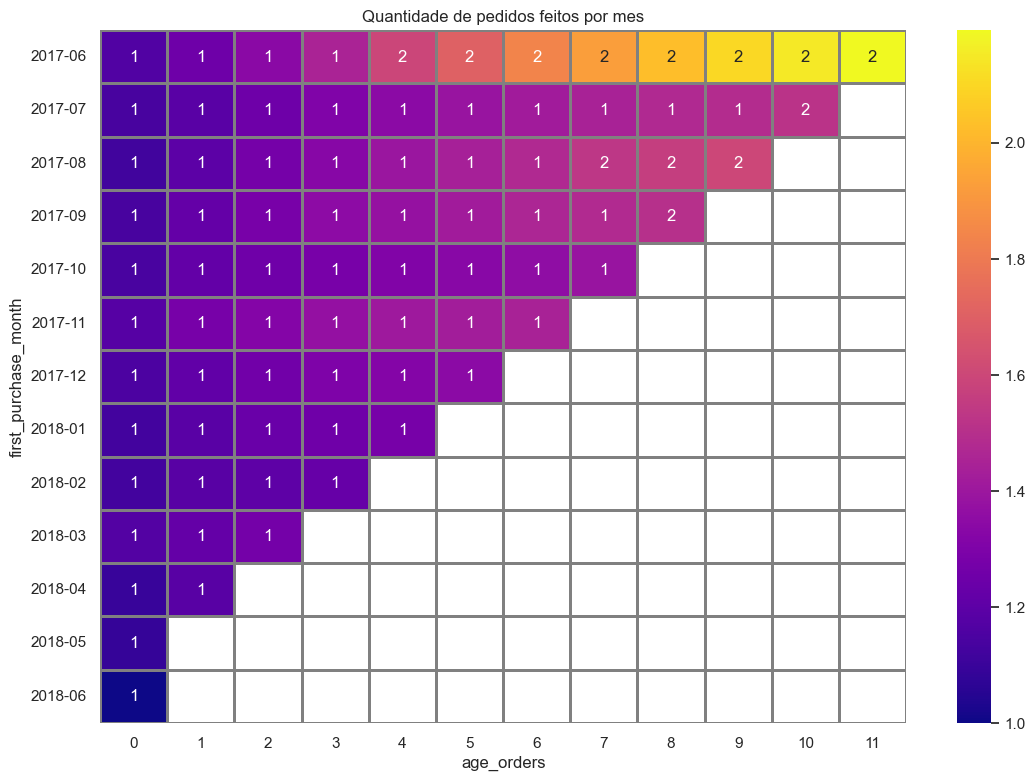

In [183]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Quantidade de pedidos feitos por mes')
sns.heatmap(orders_buyers_pivot, annot=True, fmt='.0f', linewidths=1, linecolor='grey', cmap='plasma')

Concluímos que o número total de compradores oscilou durante esse período, assim como o número total de pedidos por mês, variando de mês para mês.

Pudemos identificar que, em média, cada usuário do site faz um pedido por mês.

[Voltar ao Indice](#back)

#### 2.2.3. Qual é o volume médio de uma compra <a id='volume'></a>

Buscando saber o volume médio de uma compra iremos utilizar a tabela inicial e iremos mais uma vez agrupar os dados de 'first_purchase_month', porém dessa vez agregaremos os dados da coluna 'revenue', os somando, e os usuário utilizando nunique. Após tendo o número de compradores e a receita, iremos encontrar o volume médio de compra dividindo a coluna revenue pela coluna de n_buyers.

In [184]:
mean_pivot = orders_.pivot_table(index='purchase_month',values='revenue',aggfunc='mean').reset_index()
mean_pivot.sort_values(by='revenue', ascending=False)

,purchase_month,revenue
6,2017-12-01,5.852139
3,2017-09-01,5.416448
9,2018-03-01,5.413930
1,2017-07-01,5.306589
10,2018-04-01,5.150645
4,2017-10-01,4.928280
2,2017-08-01,4.847139
8,2018-02-01,4.840095
5,2017-11-01,4.783518
11,2018-05-01,4.771279


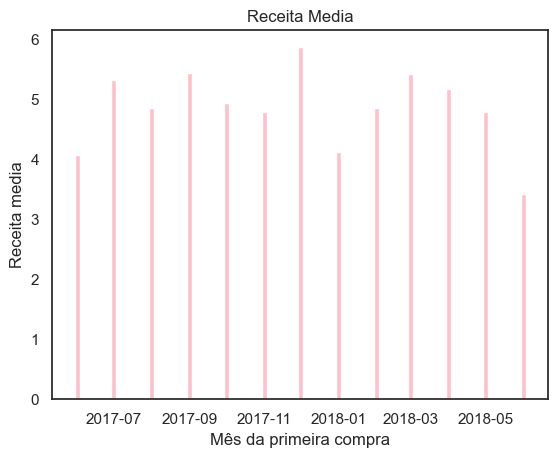

In [185]:
order_month = mean_pivot['purchase_month']
receita_media = mean_pivot['revenue']
plt.bar(order_month, receita_media, width=4, color='pink')
plt.xlabel('Mês da primeira compra')
plt.ylabel('Receita media')
plt.title('Receita Media') 
plt.show()

Calculando o valor médio total da receita, verificamos que dezembro de 2017 foi o mês com a maior receita e junho de 2018 foi o mês com a menor receita. Também verificamos que, apesar de não ter a maior receita, março de 2018 teve um valor consideravelmente alto.

In [186]:
mean = orders_.groupby('purchase_month').agg({'revenue': 'sum', 'uid': 'nunique'}).reset_index()
mean.columns = ['order_month', 'revenue','n_buyers']
mean.head()

,order_month,revenue,n_buyers
0,2017-06-01,9557.49,2023
1,2017-07-01,12539.47,1984
2,2017-08-01,8758.78,1472
3,2017-09-01,18345.51,2750
4,2017-10-01,27987.70,4675


In [187]:
mean['avg_revenue_per_purchase'] = mean['revenue'] / mean['n_buyers']
mean.head(10)

,order_month,revenue,n_buyers,avg_revenue_per_purchase
0,2017-06-01,9557.49,2023,4.724414
1,2017-07-01,12539.47,1984,6.320297
2,2017-08-01,8758.78,1472,5.950258
3,2017-09-01,18345.51,2750,6.671095
4,2017-10-01,27987.70,4675,5.986674
5,2017-11-01,27069.93,4547,5.953360
6,2017-12-01,36388.60,4942,7.363132
7,2018-01-01,19417.13,3898,4.981306
8,2018-02-01,25560.54,4258,6.002945
9,2018-03-01,28834.59,4181,6.896577


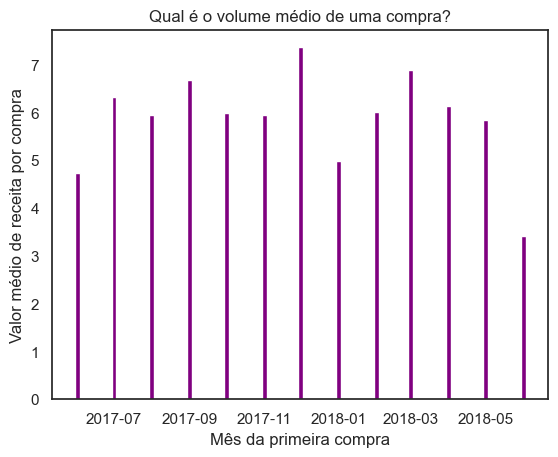

In [188]:
order_month = mean['order_month']
avg_revenue_per_purchase = mean['avg_revenue_per_purchase']
plt.bar(order_month, avg_revenue_per_purchase, width=4, color='purple')
plt.xlabel('Mês da primeira compra')
plt.ylabel('Valor médio de receita por compra')
plt.title('Qual é o volume médio de uma compra?') 
plt.show()

Tendo encontrado o valor médio total da receita, também verificamos a receita média por usuário, ou seja, a média dos valores das compras realizadas pelos mesmos. Concluímos que a receita média por usuário teve seu pico em setembro de 2017 e que, em junho de 2017, houve um volume alto. Porém, de outubro de 2017 até junho de 2018, não houve mais picos; observamos oscilações no volume, mas, em contrapartida, nenhum volume realmente baixo que pudesse preocupar.

[Voltar ao Indice](#back)

#### 2.2.4. Quanto dinheiro eles trazem para a empresa (LTV) <a id='ltv'></a>

Por fim, iremos analisar quanto dinheiro e trazido para a empresa, ou seja, iremos calcular o LTV (lifetime value). Porém, antes de realizar o calculo iremos fazer uma cohort agrupando as colunas 'first_purchase_month','purchase_month' e agregaremos a coluna revenue somando, ajustando o índice para o default usando o método reset_index(). Depois vamos fundir essa cohort com a cohort_first_purchase.  

Feito isso, antes de calcular o LTV iremos calcular o GP e a AGE, e faremos que seja exibida as idades das coortes ao invés do mês do pedido, pois sera mais fácil do LTV ser estudado para coortes mais velhas. Calcularemos o LTV dividindo o lucro bruto da coorte de cada mês pela quantidade total de usuários em cada coortee e visualizaremos as coortes como uma pivot table para melhor analisar.

Terminaremos encontrando o valor de LTV da primeira cohort e faremos isso utilizando a primeira cohort e somaremos o valor de cada mês.

In [189]:
cohorts = orders_.groupby(['first_purchase_month','purchase_month']).agg({'revenue': 'sum'}).reset_index()
cohorts

,first_purchase_month,purchase_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76


In [190]:
report = pd.merge(cohort_first_purchase, cohorts, on='first_purchase_month')
report.head()

,first_purchase_month,n_buyers,purchase_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [191]:
margin_rate = 0.5
report['gp'] = report['revenue'] * margin_rate
print(round(report['gp']), 2)

0     4779.0
1      491.0
2      443.0
3      966.0
4     1034.0
       ...  
74     557.0
75    5300.0
76     605.0
77    6963.0
78       2.0
Name: gp, Length: 79, dtype: float64 2


In [192]:
report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   first_purchase_month  79 non-null     datetime64[ns]
 1   n_buyers              79 non-null     int64         
 2   purchase_month        79 non-null     datetime64[ns]
 3   revenue               79 non-null     float64       
 4   gp                    79 non-null     float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 3.7 KB


In [193]:
report['age'] = (
    report['purchase_month'] - report['first_purchase_month']
) / np.timedelta64(1, 'M')
report['age']

0     0.000000
1     0.985647
2     2.004148
3     3.022649
4     4.008296
        ...   
74    2.004148
75    0.000000
76    0.985647
77    0.000000
78    0.000000
Name: age, Length: 79, dtype: float64

In [194]:
report['age'] = report['age'].round().astype('int')
report['age']

0     0
1     1
2     2
3     3
4     4
     ..
74    2
75    0
76    1
77    0
78    0
Name: age, Length: 79, dtype: int32

In [195]:
report.head() 

,first_purchase_month,n_buyers,purchase_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0
1,2017-06-01,2023,2017-07-01,981.82,490.910,1
2,2017-06-01,2023,2017-08-01,885.34,442.670,2
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4


In [196]:
report['ltv'] = report['gp'] / report['n_buyers']
print(report['ltv'].sum())

45.410759934940415


In [197]:
lvt_pivot = report.pivot_table(
    index='first_purchase_month', columns='age', values='ltv', aggfunc='sum'
).round()

lvt_pivot.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_month,,,,,,,,,,,,
2017-06-01,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-07-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
2017-08-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,
2017-09-01,3.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,,,
2017-10-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,
2017-11-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,,
2017-12-01,2.0,0.0,0.0,1.0,0.0,0.0,,,,,,
2018-01-01,2.0,0.0,0.0,0.0,0.0,,,,,,,
2018-02-01,2.0,0.0,0.0,0.0,,,,,,,,


In [198]:
lvt_pivot.cumsum(axis=1).round() 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_month,,,,,,,,,,,,
2017-06-01,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2017-07-01,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN
2017-08-01,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
2017-09-01,3.0,4.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,NaN,NaN,NaN
2017-10-01,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN
2017-11-01,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN
2017-12-01,2.0,2.0,2.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
ltv_201706 = lvt_pivot.loc['2017-06-01'].sum()
ltv_201706

3.0

Após todo o procedimento para calcular o LTV da coorte de 01/03/2017, concluímos que cada cliente da primeira coorte trouxe $3 de receita ao longo de seu tempo de vida.

* **Observação** 

Utilizei o valor 0,5 para a margem de lucro, valor encontrado no exercício da tarefa da matéria, ainda que se saiba que não está correto. Essa escolha se deu devido ao valor encontrado durante o cálculo da margem de lucro. Sabe-se que, para calcular a margem de lucro, precisaríamos fazer o seguinte cálculo: margin_rate = (df['revenue'] - df['costs']) / df['revenue'], ou seja, total de receita por usuário menos o custo por usuário dividido pelo total de receita por usuário. Ocorre que, durante o cálculo, encontrei um valor negativo, o que não deveria ocorrer, já que se o for, isso significaria que a empresa está tendo prejuízo com as transações desse cliente, o que não faz sentido para calcular o LTV. Portanto, se já tivermos um valor negativo, não haveria razão para calcular o LTV, e neste estudo específico não seria necessário aplicar o conhecimento sobre LTV.

[Voltar ao Indice](#back)

### 2.3. Calculando as métricas pelo marketing <a id='marketing'></a>

Por fim, iremos analisar os dados para obter informações sobre o marketing. Para calcular as métricas de marketing, iremos analisar os seguintes pontos:
- Quanto dinheiro foi gasto no total/por origem/ao longo do tempo;
- Quanto custou a aquisição de clientes para cada origem;
- Os investimentos valeram a pena? (ROI)

#### 2.3.1. Quanto dinheiro foi gasto no total/por origem/ao longo do tempo <a id='gasto'></a>

Começaremos a calcular as métricas pelo marketing verificando quanto dinheiro foi gasto no total, por origem e ao longo do tempo. Para calcular o valor total que foi gasto iremos analisar a tabela costs e somaremos a coluna de mesmo nome costs. Já para calcular o valor que foi gasto por origem iremos agrupar a coluna source_id e agragaremos a coluna costs somando a mesma. 

Para encontrar o montante total gasto ao longo do tempo antes iremos converter a coluna dt com tipo de dados de data/hora com resolução mensal (M). Com o tipo de dado convertido iremos criar uma cohort agrupando as colunas 'dt', 'source_id', e agregaremos a coluna 'costs' somando a mesma, somando e depois renomeando as colunas. Com a cohort iremos criar uma pivot table para analisarmos o valor total gasto.

In [200]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [201]:
costs_mean = costs['costs'].mean()
costs_mean

129.47742722265943

In [202]:
costs_total = costs['costs'].sum()
costs_total

329131.62

Analisando os custos concluimos que o montante gasto com marketing no total encontra-se em 329131.62. E agora iremos verificar o valor gasto por source.

In [203]:
group = costs.groupby('source_id').agg({'costs': 'sum'})
group

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


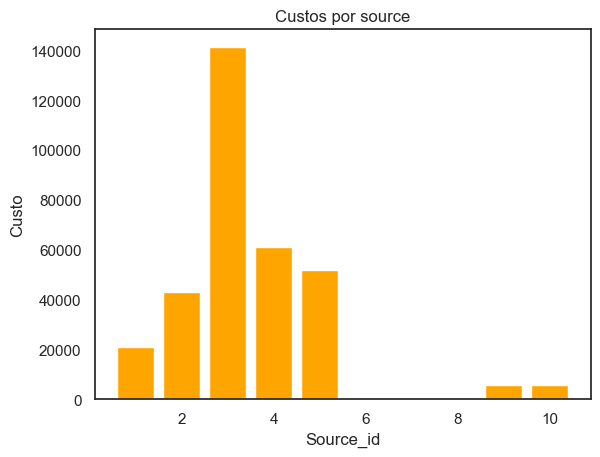

In [204]:
plt.bar(group.index, group['costs'], color='orange')
plt.title('Custos por source')
plt.xlabel('Source_id')
plt.ylabel('Custo')
plt.show()

Já quanto aos custos de marketing por source verificamos que o source que teve investimento foi o source 3 e ja nos sources 9 e 10 não houve muito investimento, nos demais apesar de não ter havido grande investimento houve mais investimentos do que nos sources 9 e 10. 

In [205]:
costs['dt'] = costs['dt'].astype('datetime64[M]')

In [206]:
cohort_costs = costs.groupby(['dt', 'source_id']).agg({'costs': 'sum'}).reset_index()
cohort_costs.head(10)

,dt,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
5,2017-06-01,9,285.22
6,2017-06-01,10,314.22
7,2017-07-01,1,1072.88
8,2017-07-01,2,2333.11
9,2017-07-01,3,7674.37


In [207]:
pivot_table = cohort_costs.pivot_table(index='dt', columns = 'source_id', values='costs', aggfunc='sum')
pivot_table

source_id,1,2,3,4,5,9,10
dt,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


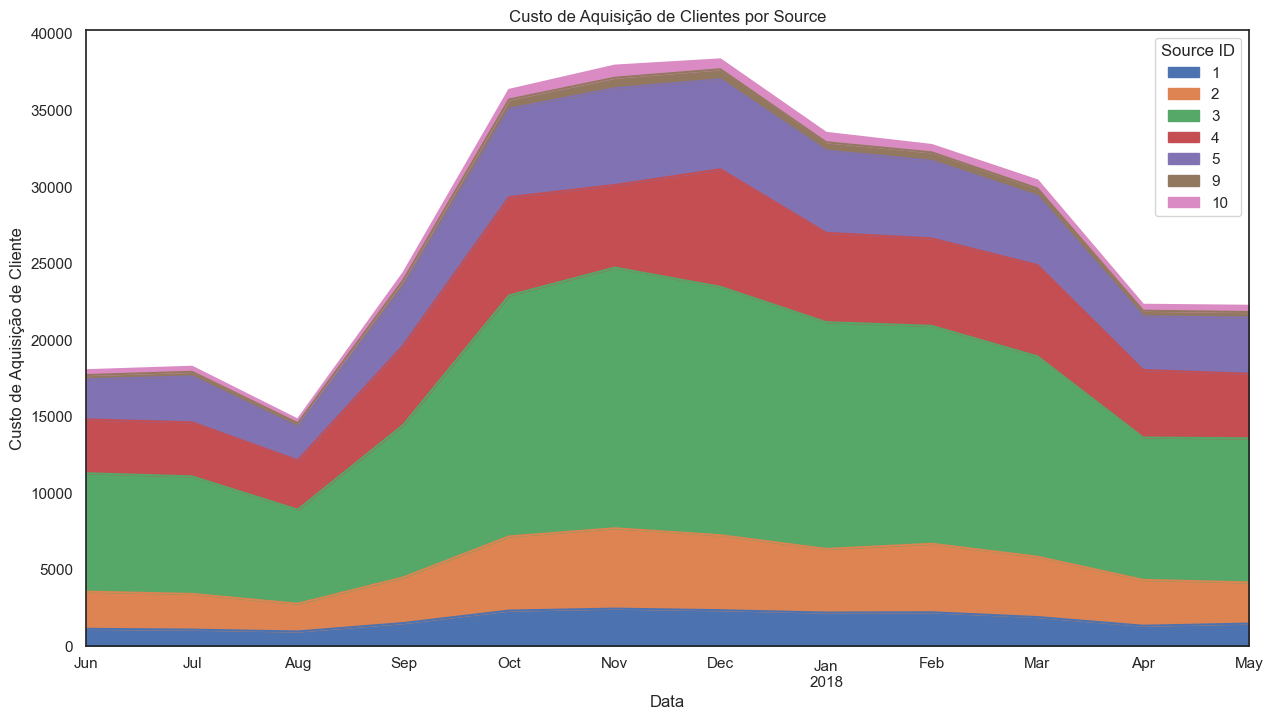

In [208]:
pivot_table.plot(kind='area', stacked=True, figsize=(15, 8))
plt.title('Custo de Aquisição de Clientes por Source')
plt.xlabel('Data')
plt.ylabel('Custo de Aquisição de Cliente')
plt.legend(title='Source ID', loc='upper right')
plt.show()

Fizemos uma tabela dinâmica para identificar o valor total gasto por origem ao longo do tempo. Inicialmente, conseguimos verificar algumas informações, mas decidimos que, para uma melhor análise e identificação das informações, um gráfico de área seria o ideal. Com o gráfico de área feito, conseguimos visualizar claramente que a origem 3 foi a que teve, durante todo o período, o maior custo de aquisição.

[Voltar ao Indice](#back)

#### 2.3.2. Quanto custou a aquisição de clientes para cada origem <a id='custo'></a>

Agora passaremos a analisar o custo de aquisição de clientes. Começaremos identificando a primeira vez que cada usuário acessou, utilizando a coluna start_ts da tabela visits e agrupando os dados por uid. Em seguida, selecionaremos a primeira linha de cada grupo.

Com essa tabela criada, iremos fundi-la com a tabela buyers criada anteriormente, para que possamos agrupar as colunas source_id e first_purchase_month, agrupando-as na coluna uid com o método de soma.

Antes de passarmos ao cálculo do CAC, fundiremos novamente nossas tabelas, desta vez utilizando a tabela criada user_buyers e a tabela costs.

Para calcular o custo de aquisição de clientes para cada origem, dividiremos o agrupamento das colunas source_id e costs, que serão somadas, pelo agrupamento das colunas source_id e uid, utilizando o método nunique.

In [209]:
users = visits.sort_values('start_ts').groupby('uid').first()

In [210]:
user_buyers = pd.merge(users, buyers, on='uid')
user_buyers.head()

,uid,device,end_ts,source_id,start_ts,session_year,session_month,session_week,session_date,session_duration_sec,first_session_month,first_purchase_month,days_to_conversion
0,313578113262317,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017,2017-09-01,2017-09-14,2017-09-18,1080,2017-09-01,2018-01-01,122
1,1575281904278712,touch,2017-06-03 10:17:00,10,2017-06-03 10:13:00,2017,2017-06-01,2017-06-01,2017-06-03,240,2017-06-01,2017-06-01,0
2,2429014661409475,desktop,2017-10-11 17:27:00,3,2017-10-11 17:14:00,2017,2017-10-01,2017-10-05,2017-10-11,780,2017-10-01,2017-10-01,0
3,2464366381792757,desktop,2018-01-27 20:13:00,5,2018-01-27 20:10:00,2018,2018-01-01,2018-01-25,2018-01-27,180,2018-01-01,2018-01-01,0
4,2551852515556206,desktop,2017-11-24 10:14:19,5,2017-11-24 10:14:00,2017,2017-11-01,2017-11-23,2017-11-24,19,2017-11-01,2017-11-01,0


In [211]:
user_buyers_groupby = user_buyers.groupby(['source_id','first_purchase_month']).agg({'uid':'count'}).reset_index()
user_buyers_groupby

,source_id,first_purchase_month,uid
0,1,2017-06-01,190
1,1,2017-07-01,160
2,1,2017-08-01,113
3,1,2017-09-01,227
4,1,2017-10-01,340
...,...,...,...
81,10,2018-01-01,92
82,10,2018-02-01,123
83,10,2018-03-01,186
84,10,2018-04-01,107


In [212]:
user_buyers

,uid,device,end_ts,source_id,start_ts,session_year,session_month,session_week,session_date,session_duration_sec,first_session_month,first_purchase_month,days_to_conversion
0,313578113262317,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017,2017-09-01,2017-09-14,2017-09-18,1080,2017-09-01,2018-01-01,122
1,1575281904278712,touch,2017-06-03 10:17:00,10,2017-06-03 10:13:00,2017,2017-06-01,2017-06-01,2017-06-03,240,2017-06-01,2017-06-01,0
2,2429014661409475,desktop,2017-10-11 17:27:00,3,2017-10-11 17:14:00,2017,2017-10-01,2017-10-05,2017-10-11,780,2017-10-01,2017-10-01,0
3,2464366381792757,desktop,2018-01-27 20:13:00,5,2018-01-27 20:10:00,2018,2018-01-01,2018-01-25,2018-01-27,180,2018-01-01,2018-01-01,0
4,2551852515556206,desktop,2017-11-24 10:14:19,5,2017-11-24 10:14:00,2017,2017-11-01,2017-11-23,2017-11-24,19,2017-11-01,2017-11-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36518,18445147675727495770,touch,2017-08-20 13:30:00,5,2017-08-20 13:30:00,2017,2017-08-01,2017-08-17,2017-08-20,0,2017-08-01,2017-11-01,92
36519,18445407535914413204,desktop,2017-09-22 23:55:00,3,2017-09-22 23:48:00,2017,2017-09-01,2017-09-21,2017-09-22,420,2017-09-01,2017-09-01,0
36520,18445601152732270159,desktop,2017-08-07 11:52:00,2,2017-08-07 11:51:00,2017,2017-08-01,2017-08-03,2017-08-07,60,2017-08-01,2018-03-01,212
36521,18446156210226471712,desktop,2017-11-07 10:04:00,3,2017-11-07 10:01:00,2017,2017-11-01,2017-11-02,2017-11-07,180,2017-11-01,2018-02-01,92


In [ ]:
costs_ = pd.merge(costs, user_buyers, on='source_id')
costs_

In [ ]:
costs_cac_by_source = costs_.groupby('source_id')['costs'].sum() / costs_.groupby('source_id')['uid'].nunique()
costs_cac_by_source.sort_values()

In [ ]:
plt.bar(costs_cac_by_source.index, costs_cac_by_source.values)
plt.xlabel('source_id')
plt.ylabel('CAC (Customer Acquisition Cost)')
plt.title('CAC por source_id')
plt.show()

Concluímos e confirmamos com base no gráfico acima que a origem que teve o maior valor investido para a aquisição de clientes foi o source 3, enquanto as que tiveram o menor valor foram os source 9 e 10.

[Voltar ao Indice](#back)

#### 2.3.3.  Os investimentos valeram a pena? (ROI) <a id='roi'></a>

Terminaremos de analisar as métricas de marketing verificando se os investimentos valeram a pena. Primeiramente, faremos uma coorte da tabela costs_ e a fundiremos com a tabela report.

Para calcular o ROI (Return on Investment), subtrairemos os investimentos da receita e dividiremos o resultado pelos investimentos. Iremos somar o resultado para encontrar o ROI total.

Acreditamos que, para este estudo, seria importante também encontrar o ROI por origem (source_id), além de calcular o ROMI (Return on Marketing Investment) e o valor do ROMI por origem.

Para calcular o ROI por origem, criaremos uma coorte agrupando por source_id, somando as colunas revenue e costs. Em seguida, subtrairemos os investimentos da receita e dividiremos pelos investimentos.

Para calcular o ROMI, será necessário calcular o CAC (Custo de Aquisição de Clientes) primeiro. O valor do CAC será encontrado dividindo a coluna costs pela coluna uid e somando os resultados. Então, para obter o valor total do ROMI, dividiremos o LTV pelo CAC.

Para encontrar o valor do ROMI por origem, utilizaremos uma tabela dinâmica onde o índice será source_id, o valor será romi_total, e a função agregadora será sum.

Iremos criar gráficos para o ROI e ROMI por source_id.

In [ ]:
costs_cohorts = costs_.groupby(['first_purchase_month', 'costs', 'source_id']).agg({'uid': 'nunique'}).reset_index()
costs_cohorts

In [ ]:
report_ = pd.merge(report, costs_cohorts, on='first_purchase_month')
report_.head()

In [ ]:
roi = (report_['revenue'] - report_['costs']) / report_['costs']
round(roi.sum(), 2)

Calculando o Retorno de investimento (ROI) pudemos verificar que no período de janeiro de 2017 até dezembro de 2018 foram investidos o valor total aproximado de 406995024.88. 

In [ ]:
roi_source = report_.groupby('source_id').agg({'revenue': 'sum', 'costs': 'sum'}).reset_index()

In [ ]:
roi_source['roi_source'] = (roi_source['revenue'] - roi_source['costs']) / roi_source['costs']
roi_source = roi_source.sort_values(by='roi_source')
roi_source

In [ ]:
plt.bar(roi_source['source_id'], roi_source['roi_source'].values)
plt.xlabel('Source ID')
plt.ylabel('ROI')
plt.title('ROI por source_id')
plt.show()

Encontramos o valor do ROI por source ID e verificamos que as duas sources que mais tiveram retornos foram 9 e 10 e que a source 3, pouco teve retorno. 

In [ ]:
report_['cac'] = report_['costs'] / report_['n_buyers']
print(report_['cac'].sum())

In [ ]:
report_['romi_total'] = report_['ltv'] / report_['cac'] 
print(round(report_['romi_total'].sum(),2))

Sabendo que o valor do CAC total era 71281.78351166665, pudemos calcular o ROMI total e verificamos que o montante de Retorno do investimento (ROI) em marketing foi 11763241.97.

In [ ]:
report_

In [ ]:
romi_pivot = report_.pivot_table(index='source_id', values='romi_total', aggfunc='sum')
romi_pivot['romi_total'] = romi_pivot['romi_total'].apply('{:.2f}'.format)
romi_pivot = romi_pivot.reset_index().sort_values(by='romi_total', ascending=True)
romi_pivot

Por fim, encontramos o ROMI por source e verificamos que tambem as origens que apresentaram melhores retornos foram 9 e 10 e que a origem 3 foi o que apresentou menor retorno. 

[Voltar ao Indice](#back)

# 3. CONCLUSÃO <a id='conclusao'></a>

Essa conclusão visa recomendar aos especialistas de marketing:
- quanto dinheiro e onde seria melhor investir.
- quais origens/plataformas. 

Visando otimizar as despesas com marketing da empresa Y.Afisha, o presente estudo teve como escopo a análise das métricas pelo produto, pelas vendas e pelo marketing.

Com relação ao produto, verificamos que o total de usuários diários, semanais e mensais eram 907, 5716 e 23228, respectivamente. Também observamos que a média de sessões por cada usuário era de aproximadamente 1 vez por dia e que a duração média da sessão era de 10 minutos. Foi possível identificar que a taxa de usuários que voltam diminui ao longo dos dias, sendo que apenas 4% deles retornam ao final do mês.

Quanto às vendas, observamos que há usuários que realizam a primeira compra na primeira sessão, enquanto outros esperam alguns dias após a primeira sessão para realizar a compra. Identificamos que, em média, um cliente leva 17 dias desde o primeiro acesso para fazer sua primeira compra.

Quanto ao marketing, encontramos o valor total gasto com marketing e também o total gasto por origem ao longo do tempo. Além disso, analisamos o custo de aquisição de clientes para cada origem e vimos que a source 3 foi a que teve mais investimentos.

Portanto, utilizando as métricas de produto, marketing e vendas que são importantes, considerando que a análise da métrica de CAC indica o quanto é preciso gastar para adquirir um novo cliente, a análise da métrica de LTV indica quanto esse cliente irá gerar de receita ao longo do tempo, e a taxa de conversão indica a porcentagem de visitantes do site que realizam uma compra, pudemos concluir que:

- seria recomendado o investimento em origem que apresentaram um bom retorno financeiro e que então tiveram um custo de aquisição de cliente (CAC) mais baixo e que geraram um alto valor de vida útil do cliente (LTV).

- apesar da source 3 ter recebido um grande investimento em marketing, a mesma não gerou um alto retorno financeiro. 

- as plataformas 9 e 10 foram as que menos tiveram investimentos, porém foram as que tiveram um ROI maior. Sendo assim, recomenda-se o aumento de investimentos nesssas origens.

- recomenda-se considerar outras plataformas que também tiveram um bom retorno financeiro, como a plataforma 1, por exemplo.









[Voltar ao Indice](#back)